In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import plotly.figure_factory as ff
import tensorflow as tf
from tensorflow.python.keras.layers import Dense, Dropout, LSTM
from tensorflow.python.keras import Sequential
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import OrdinalEncoder
from pandas import DataFrame
from pandas import concat
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score
import seaborn as sns
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.utils import class_weight
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
import os
import more_itertools as mit
import missingno as msno

Error importing optional module geopandas
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.7/site-packages/_plotly_utils/optional_imports.py", line 28, in get_module
    return import_module(name)
  File "/opt/anaconda3/lib/python3.7/importlib/__init__.py", line 127, in import_module
    return _bootstrap._gcd_import(name[level:], package, level)
  File "<frozen importlib._bootstrap>", line 1006, in _gcd_import
  File "<frozen importlib._bootstrap>", line 983, in _find_and_load
  File "<frozen importlib._bootstrap>", line 967, in _find_and_load_unlocked
  File "<frozen importlib._bootstrap>", line 677, in _load_unlocked
  File "<frozen importlib._bootstrap_external>", line 728, in exec_module
  File "<frozen importlib._bootstrap>", line 219, in _call_with_frames_removed
  File "/opt/anaconda3/lib/python3.7/site-packages/geopandas/__init__.py", line 1, in <module>
    from geopandas.geoseries import GeoSeries  # noqa
  File "/opt/anaconda3/lib/python3.7/site-package

In [2]:
house_data = pd.read_csv("/Users/soniajoseph/Masters-DataScience/Major Research Project/mywork/agg_data.csv")

In [3]:
house_data = house_data.drop(house_data[house_data['auxHeat1'].isnull()].index.tolist())

In [4]:
house_data.head()

,Month,Day,HourofDay,T_ctrl,T_stp_heat,T_out,RH_out,Humidity,fan,auxHeat1
0,1,1,0,70.0,70.0,41.5,95.5,37.000000,200.0,960.0
1,1,1,1,70.0,70.0,42.0,94.0,37.000000,182.5,1065.0
2,1,1,2,70.0,70.0,41.5,92.5,37.333333,200.0,1575.0
3,1,1,3,70.0,70.0,38.5,89.5,37.000000,200.0,1440.0
4,1,1,4,70.0,70.0,35.0,86.0,37.083333,217.5,1680.0


In [5]:
house_data.count()

Month         3442
Day           3442
HourofDay     3442
T_ctrl        3442
T_stp_heat    3442
T_out         3442
RH_out        3442
Humidity      3442
fan           3442
auxHeat1      3442
dtype: int64

In [6]:
house_data.columns

Index(['Month', 'Day', 'HourofDay', 'T_ctrl', 'T_stp_heat', 'T_out', 'RH_out',
       'Humidity', 'fan', 'auxHeat1'],
      dtype='object')

In [7]:
house_data.head()

,Month,Day,HourofDay,T_ctrl,T_stp_heat,T_out,RH_out,Humidity,fan,auxHeat1
0,1,1,0,70.0,70.0,41.5,95.5,37.000000,200.0,960.0
1,1,1,1,70.0,70.0,42.0,94.0,37.000000,182.5,1065.0
2,1,1,2,70.0,70.0,41.5,92.5,37.333333,200.0,1575.0
3,1,1,3,70.0,70.0,38.5,89.5,37.000000,200.0,1440.0
4,1,1,4,70.0,70.0,35.0,86.0,37.083333,217.5,1680.0


In [8]:
house_data.Month.unique()

array([ 1,  2,  3,  4, 10, 11, 12])

In [9]:
house_data.Day.unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31])

In [10]:
house_data.HourofDay.unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23])

In [11]:
house_data.auxHeat1.unique()


array([ 960., 1065., 1575., 1440., 1680., 1260., 1230., 1470., 1800.,
       1200.,  735., 1350., 1080.,  630., 1380.,  945.,   75., 1530.,
       1455., 1050., 1590., 1935., 2010., 2040., 2070., 2130., 2115.,
       2790., 1545., 1395., 1305.,  750.,  855., 3120., 3600., 1605.,
       1815.,  795., 3180., 1650., 1320., 2685., 1995., 1335., 1950.,
       1125., 1365., 1710., 1635., 1425.,  840.,  720.,  525.,  480.,
        345.,  495., 2445.,  975., 1170.,  300., 3000.,  825.,  765.,
       1110., 1275.,  615., 2880., 3435.,   30.,  915.,   45.,  555.,
       2640., 2085., 3585., 1875.,  990.,  900., 2430., 2835., 3225.,
        180., 2745., 3330., 2925., 2205., 1410.,  675., 3510., 1485.,
       3300., 1830., 1215., 1020.,  585., 1140.,  780., 1755., 1770.,
        465., 1515., 3390., 2055., 1740., 1290., 3345., 1665., 3405.,
       2145., 2100., 2715.,  105., 2265., 2340., 2370., 3030., 2550.,
       2625., 3135., 3105., 3150., 3165., 2565., 2610., 1905.,  705.,
       2025., 1965.,

In [12]:
house_data.auxHeat1.min()

15.0

In [13]:
house_data.auxHeat1.max()

5250.0

In [14]:
house_data.count()

Month         3442
Day           3442
HourofDay     3442
T_ctrl        3442
T_stp_heat    3442
T_out         3442
RH_out        3442
Humidity      3442
fan           3442
auxHeat1      3442
dtype: int64

In [15]:
house_data.count()

Month         3442
Day           3442
HourofDay     3442
T_ctrl        3442
T_stp_heat    3442
T_out         3442
RH_out        3442
Humidity      3442
fan           3442
auxHeat1      3442
dtype: int64

[Text(0.5, 0, 'Target Variable Values')]

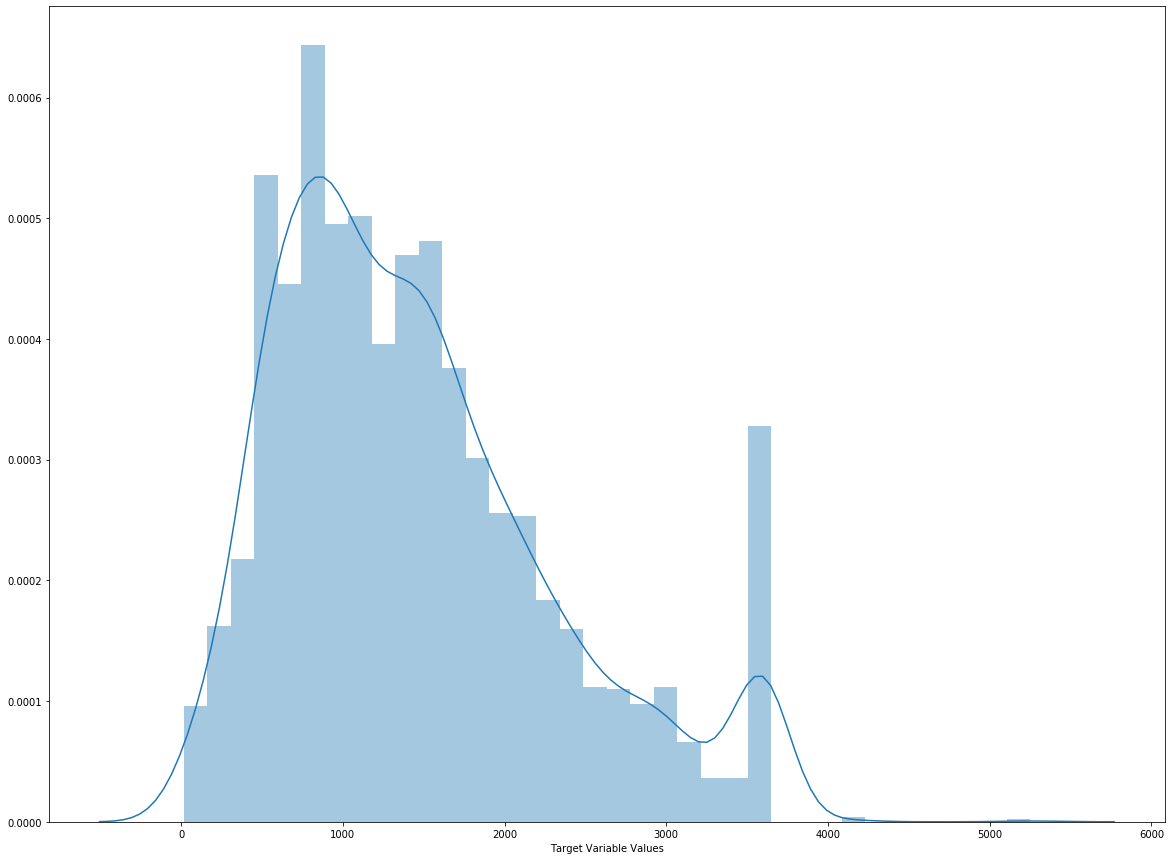

In [16]:
plt.figure(figsize = (20, 15))
ax = sns.distplot(house_data.auxHeat1)
ax.set(xlabel = 'Target Variable Values')

In [17]:
df = house_data
df.columns

Index(['Month', 'Day', 'HourofDay', 'T_ctrl', 'T_stp_heat', 'T_out', 'RH_out',
       'Humidity', 'fan', 'auxHeat1'],
      dtype='object')

In [18]:
df

,Month,Day,HourofDay,T_ctrl,T_stp_heat,T_out,RH_out,Humidity,fan,auxHeat1
0,1,1,0,70.0,70.0,41.5,95.5,37.000000,200.00,960.0
1,1,1,1,70.0,70.0,42.0,94.0,37.000000,182.50,1065.0
2,1,1,2,70.0,70.0,41.5,92.5,37.333333,200.00,1575.0
3,1,1,3,70.0,70.0,38.5,89.5,37.000000,200.00,1440.0
4,1,1,4,70.0,70.0,35.0,86.0,37.083333,217.50,1680.0
...,...,...,...,...,...,...,...,...,...,...
3437,12,31,17,70.0,70.0,33.0,72.0,35.583333,195.00,525.0
3438,12,31,18,70.0,70.0,33.0,72.0,33.083333,200.00,825.0
3439,12,31,21,70.0,70.0,29.0,76.0,31.416667,211.25,870.0
3440,12,31,22,70.0,70.0,30.0,72.5,31.166667,218.75,930.0


In [19]:
df['combined']=df['Month'].astype(str)+'_'+df['Day'].astype(str)+'_'+df['HourofDay'].astype(str)
df

,Month,Day,HourofDay,T_ctrl,T_stp_heat,T_out,RH_out,Humidity,fan,auxHeat1,combined
0,1,1,0,70.0,70.0,41.5,95.5,37.000000,200.00,960.0,1_1_0
1,1,1,1,70.0,70.0,42.0,94.0,37.000000,182.50,1065.0,1_1_1
2,1,1,2,70.0,70.0,41.5,92.5,37.333333,200.00,1575.0,1_1_2
3,1,1,3,70.0,70.0,38.5,89.5,37.000000,200.00,1440.0,1_1_3
4,1,1,4,70.0,70.0,35.0,86.0,37.083333,217.50,1680.0,1_1_4
...,...,...,...,...,...,...,...,...,...,...,...
3437,12,31,17,70.0,70.0,33.0,72.0,35.583333,195.00,525.0,12_31_17
3438,12,31,18,70.0,70.0,33.0,72.0,33.083333,200.00,825.0,12_31_18
3439,12,31,21,70.0,70.0,29.0,76.0,31.416667,211.25,870.0,12_31_21
3440,12,31,22,70.0,70.0,30.0,72.5,31.166667,218.75,930.0,12_31_22


In [20]:
# def f(row):
#     if row['auxHeat1'] >= 0.0 and row['auxHeat1'] < 900.0:
#         val = 900.0
#     elif row['auxHeat1'] > 900.0 and row['auxHeat1'] < 1800.0:
#         val = 1800.0
#     elif row['auxHeat1'] > 1800.0 and row['auxHeat1'] < 2700.0:
#         val = 2700.00
#     else:
#         val = 3600.00
#     return val

In [21]:
#df['auxHeat1'] = df.apply(f, axis =1) 

In [22]:
df['auxHeat1'].unique()

array([ 960., 1065., 1575., 1440., 1680., 1260., 1230., 1470., 1800.,
       1200.,  735., 1350., 1080.,  630., 1380.,  945.,   75., 1530.,
       1455., 1050., 1590., 1935., 2010., 2040., 2070., 2130., 2115.,
       2790., 1545., 1395., 1305.,  750.,  855., 3120., 3600., 1605.,
       1815.,  795., 3180., 1650., 1320., 2685., 1995., 1335., 1950.,
       1125., 1365., 1710., 1635., 1425.,  840.,  720.,  525.,  480.,
        345.,  495., 2445.,  975., 1170.,  300., 3000.,  825.,  765.,
       1110., 1275.,  615., 2880., 3435.,   30.,  915.,   45.,  555.,
       2640., 2085., 3585., 1875.,  990.,  900., 2430., 2835., 3225.,
        180., 2745., 3330., 2925., 2205., 1410.,  675., 3510., 1485.,
       3300., 1830., 1215., 1020.,  585., 1140.,  780., 1755., 1770.,
        465., 1515., 3390., 2055., 1740., 1290., 3345., 1665., 3405.,
       2145., 2100., 2715.,  105., 2265., 2340., 2370., 3030., 2550.,
       2625., 3135., 3105., 3150., 3165., 2565., 2610., 1905.,  705.,
       2025., 1965.,

In [23]:
df.head()

,Month,Day,HourofDay,T_ctrl,T_stp_heat,T_out,RH_out,Humidity,fan,auxHeat1,combined
0,1,1,0,70.0,70.0,41.5,95.5,37.000000,200.0,960.0,1_1_0
1,1,1,1,70.0,70.0,42.0,94.0,37.000000,182.5,1065.0,1_1_1
2,1,1,2,70.0,70.0,41.5,92.5,37.333333,200.0,1575.0,1_1_2
3,1,1,3,70.0,70.0,38.5,89.5,37.000000,200.0,1440.0,1_1_3
4,1,1,4,70.0,70.0,35.0,86.0,37.083333,217.5,1680.0,1_1_4


In [24]:
numerical_vars = ['T_ctrl', 'T_stp_heat', 'T_out', 'RH_out','Humidity', 'fan']
predsc = StandardScaler()
predsc.fit(df[numerical_vars])
scalar_data = predsc.transform(df[numerical_vars])

In [25]:

y_auxHeat = df[['auxHeat1']].to_numpy()
targsc = StandardScaler()
targsc.fit(y_auxHeat)
y_auxHeat = targsc.transform(y_auxHeat)

In [26]:
y_auxHeat

array([[-0.57621365],
       [-0.45497808],
       [ 0.13388042],
       ...,
       [-0.68012986],
       [-0.61085239],
       [-0.55889429]])

In [27]:
s=df[numerical_vars].copy()
s[numerical_vars]=scalar_data
s["auxHeat1"] = y_auxHeat
# s['combined']=df['combined']
s.head(10)

,T_ctrl,T_stp_heat,T_out,RH_out,Humidity,fan,auxHeat1
0,0.343517,0.298575,0.851287,1.867125,0.893055,-0.371311,-0.576214
1,0.343517,0.298575,0.894123,1.751500,0.893055,-0.897772,-0.454978
2,0.343517,0.298575,0.851287,1.635875,0.939806,-0.371311,0.133880
3,0.343517,0.298575,0.594272,1.404625,0.893055,-0.371311,-0.021994
4,0.343517,0.298575,0.294420,1.134834,0.904743,0.155149,0.255116
5,0.343517,0.298575,0.251585,1.057750,0.904743,-0.484124,-0.229826
6,0.343517,0.298575,0.165913,0.672334,0.881367,-0.371311,-0.264465
7,0.343517,0.298575,0.165913,0.441084,0.869680,-0.371311,0.012645
8,0.343517,0.298575,0.123077,0.286917,0.811242,-0.371311,0.393671
9,0.343517,0.298575,-0.005431,0.209834,0.776179,-0.070477,0.012645


In [28]:
X = s.drop(labels = ['auxHeat1'], axis = 1)

In [30]:
y_auxHeat = s['auxHeat1']
#_auxHeat = to_categorical(y_auxHeat)
y_auxHeat = np.array(y_auxHeat).reshape(-1,1)

In [31]:
X.count()

T_ctrl        3442
T_stp_heat    3442
T_out         3442
RH_out        3442
Humidity      3442
fan           3442
dtype: int64

In [32]:
#y_auxHeat = abs(y_auxHeat)
y_auxHeat

array([[-0.57621365],
       [-0.45497808],
       [ 0.13388042],
       ...,
       [-0.68012986],
       [-0.61085239],
       [-0.55889429]])

In [33]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y_auxHeat, test_size=0.3, random_state=42)

In [34]:
X_train.shape,X_test.shape

((2409, 6), (1033, 6))

In [35]:
y_train.shape,y_test.shape

((2409, 1), (1033, 1))

In [36]:
X_train = X_train.values
X_test = X_test.values

In [37]:
X_train = X_train.astype(float)
X_test = X_test.astype(float)

In [38]:
y_train

array([[-0.8186848 ],
       [ 1.15572312],
       [-0.7667267 ],
       ...,
       [-0.29910377],
       [-0.48961681],
       [ 0.46294841]])

In [39]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn import linear_model    


In [40]:
model = linear_model.LinearRegression()

model.fit(X,y_auxHeat)
predict_y = model.predict(X)


In [41]:
predict_y

array([[-0.4561803 ],
       [-0.77809276],
       [-0.46000746],
       ...,
       [ 0.09743783],
       [ 0.20271017],
       [-0.14977736]])

In [42]:
rmse = np.sqrt(mean_squared_error(y_auxHeat,predict_y))

mae = mean_absolute_error(y_auxHeat, predict_y)


r_s = r2_score(predict_y,y_auxHeat)

print(rmse,mae,r_s)

0.6221045055910951 0.46271498375734327 0.36864132965408913


In [43]:
X

,T_ctrl,T_stp_heat,T_out,RH_out,Humidity,fan
0,0.343517,0.298575,0.851287,1.867125,0.893055,-0.371311
1,0.343517,0.298575,0.894123,1.751500,0.893055,-0.897772
2,0.343517,0.298575,0.851287,1.635875,0.939806,-0.371311
3,0.343517,0.298575,0.594272,1.404625,0.893055,-0.371311
4,0.343517,0.298575,0.294420,1.134834,0.904743,0.155149
...,...,...,...,...,...,...
3437,0.343517,0.298575,0.123077,0.055667,0.694365,-0.521728
3438,0.343517,0.298575,0.123077,0.055667,0.343736,-0.371311
3439,0.343517,0.298575,-0.219610,0.364000,0.109983,-0.032872
3440,0.343517,0.298575,-0.133939,0.094209,0.074920,0.192753


In [44]:
X_train.shape, y_train.shape

((2409, 6), (2409, 1))

In [45]:
classifier = Sequential()

# Adding the input layer and the first hidden layer
classifier.add(Dense(units = 24, kernel_initializer = 'uniform', activation = 'relu', input_dim = 6))

# Adding the second hidden layer
classifier.add(Dense(units = 24, kernel_initializer = 'uniform', activation = 'relu'))

# Adding the output layer
classifier.add(Dense(units = 1, kernel_initializer = 'normal', activation = 'linear'))


# Compiling the ANN
classifier.compile(optimizer = 'adam', loss = 'mean_absolute_error', metrics = ['mse']) 

# Fitting the ANN to the Training set
history = classifier.fit(X_train, y_train, validation_data = (X_test, y_test), batch_size =64, epochs = 50, shuffle = True)

Epoch 1/50
38/38 [==============================] - 0s 6ms/step - loss: 0.7816 - mse: 0.9804 - val_loss: 0.7489 - val_mse: 0.8970
Epoch 2/50
38/38 [==============================] - 0s 2ms/step - loss: 0.6680 - mse: 0.7679 - val_loss: 0.5578 - val_mse: 0.5673
Epoch 3/50
38/38 [==============================] - 0s 2ms/step - loss: 0.4983 - mse: 0.4757 - val_loss: 0.4430 - val_mse: 0.3927
Epoch 4/50
38/38 [==============================] - 0s 3ms/step - loss: 0.4517 - mse: 0.4022 - val_loss: 0.4257 - val_mse: 0.3616
Epoch 5/50
38/38 [==============================] - 0s 3ms/step - loss: 0.4410 - mse: 0.3895 - val_loss: 0.4188 - val_mse: 0.3529
Epoch 6/50
38/38 [==============================] - 0s 3ms/step - loss: 0.4361 - mse: 0.3863 - val_loss: 0.4159 - val_mse: 0.3546
Epoch 7/50
38/38 [==============================] - 0s 3ms/step - loss: 0.4328 - mse: 0.3818 - val_loss: 0.4144 - val_mse: 0.3479
Epoch 8/50
38/38 [==============================] - 0s 3ms/step - loss: 0.4302 - mse: 0.38

In [46]:
min(history.history['loss']),min(history.history['val_loss']),min(history.history['mse']),min(history.history['val_mse'])


(0.39345961809158325,
 0.3892943561077118,
 0.36690133810043335,
 0.33228641748428345)

In [47]:
classifier.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 24)                168       
_________________________________________________________________
dense_1 (Dense)              (None, 24)                600       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 25        
Total params: 793
Trainable params: 793
Non-trainable params: 0
_________________________________________________________________


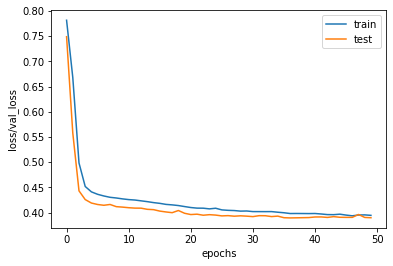

In [75]:
plt.plot(history.history['loss'], label = 'train')
plt.plot(history.history['val_loss'], label = 'test')
plt.legend()
plt.xlabel("epochs")
plt.ylabel("loss/val_loss")
plt.savefig("Agg_Loss.png")
plt.show()

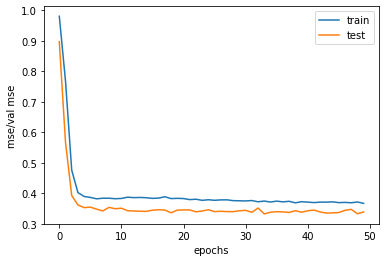

In [76]:
plt.plot(history.history['mse'], label = 'train')
plt.plot(history.history['val_mse'], label = 'test')
plt.legend()
plt.xlabel("epochs")
plt.ylabel("mse/val mse")
plt.savefig("Agg_mse.png")
plt.show()

In [50]:
y_predicted = classifier.predict(X_test)

In [51]:
y_predicted

array([[ 0.30680794],
       [ 1.603356  ],
       [ 0.22763675],
       ...,
       [-0.7313641 ],
       [ 2.0611696 ],
       [-0.6928943 ]], dtype=float32)

In [52]:
#y_predicted = np.argmax(y_predicted, axis = 1)

In [53]:
#y_test = np.argmax(y_test, axis = 1)

In [54]:
test_sum = y_test.sum()*15
test_sum

309.7201847981347

In [55]:
predicted_sum = y_predicted.sum()*15
predicted_sum

1236.4109802246094

In [56]:
from sklearn.metrics import mean_absolute_error,f1_score,accuracy_score

In [57]:
y_train_predicted = classifier.predict(X_train)
# y_train_predicted = np.argmax(y_train_predicted, axis = 1)
# y_train = np.argmax(y_train, axis = 1)

In [58]:
y_train_predicted

array([[ 0.08278903],
       [ 0.670887  ],
       [-0.5511532 ],
       ...,
       [-0.42482856],
       [ 0.03414378],
       [ 0.31622392]], dtype=float32)

In [59]:
y_train

array([[-0.8186848 ],
       [ 1.15572312],
       [-0.7667267 ],
       ...,
       [-0.29910377],
       [-0.48961681],
       [ 0.46294841]])

In [60]:
cutoff = 0.5                                                      
y_pred_classes_train = np.zeros_like(y_train_predicted)    
y_pred_classes_train[y_train_predicted > cutoff] = 1 

In [61]:
y_train_classes = np.zeros_like(y_train_predicted)
y_train_classes[y_train > cutoff] = 1

In [62]:
confusion_matrix(y_train_classes,y_pred_classes_train)

array([[1671,  130],
       [ 148,  460]])

In [63]:
accuracy_score(y_train_classes,y_pred_classes_train)

0.8845994188459941

In [64]:
f1_score(y_train_classes,y_pred_classes_train)

0.7679465776293823

In [65]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_train, y_train_predicted)

0.3665203967575267

In [66]:
mean_absolute_error(y_train, y_train_predicted)

0.3906546535341047

In [67]:
mean_absolute_error(y_test, y_predicted)

0.3896580289578332

In [68]:
rmse = np.sqrt(mean_squared_error(y_train, y_train_predicted))

mae = mean_absolute_error(y_train, y_train_predicted)


# r_s = r2_score(predict_y,y_auxHeat)
r_s = r2_score(y_train, y_train_predicted)

print(rmse,mae,r_s)

0.6054092803695089 0.3906546535341047 0.636220166243147


In [69]:
cutoff = 0.5                                                      
y_pred_classes = np.zeros_like(y_predicted)    
y_pred_classes[y_predicted > cutoff] = 1  

In [70]:
y_test_classes = np.zeros_like(y_predicted)
y_test_classes[y_test > cutoff] = 1

In [71]:
confusion_matrix(y_test_classes, y_pred_classes)

array([[695,  56],
       [ 73, 209]])

In [72]:
accuracy_score(y_test_classes, y_pred_classes)


0.8751210067763795

In [73]:
f1_score(y_test_classes, y_pred_classes)

0.7641681901279708

In [74]:
rmse = np.sqrt(mean_squared_error(y_test, y_predicted))

mae = mean_absolute_error(y_test, y_predicted)


# r_s = r2_score(predict_y,y_auxHeat)
r_s = r2_score(y_test, y_predicted)

print(rmse,mae,r_s)

0.5821589752787051 0.3896580289578332 0.6548297179454938


In [114]:
mean_squared_error(y_test, y_predicted)

0.26951020763936173

In [115]:
#Cross Validation

In [116]:
from sklearn.model_selection import cross_validate, GridSearchCV
from keras.wrappers.scikit_learn import KerasClassifier

In [108]:
df = house_data

In [109]:
df.head()

,Month,Day,HourofDay,T_ctrl,T_stp_heat,T_out,RH_out,Humidity,fan,auxHeat1,combined
0,1,1,0,69.016667,65.600000,33.3,93.0,38.466667,60.00,960.0,1_1_0
1,1,1,1,68.566667,65.600000,33.4,91.8,38.233333,63.75,1500.0,1_1_1
2,1,1,2,68.166667,65.600000,32.9,89.4,37.700000,76.50,2475.0,1_1_2
3,1,1,3,68.000000,65.600000,31.1,87.0,37.516667,88.25,3045.0,1_1_3
4,1,1,4,67.866667,65.616667,29.8,83.6,36.950000,112.25,4515.0,1_1_4


In [110]:
y_auxHeat = df[['auxHeat1']].to_numpy()
# oe = OrdinalEncoder()
# y_auxHeat = oe.fit_transform(y_auxHeat.reshape(-1, 1))

In [111]:
reframed = series_to_supervised(s, 6, 1)
reframed

,var1(t-6),var2(t-6),var3(t-6),var4(t-6),var5(t-6),var6(t-6),var7(t-6),var8(t-6),var1(t-5),var2(t-5),...,var7(t-1),var8(t-1),var1(t),var2(t),var3(t),var4(t),var5(t),var6(t),var7(t),var8(t)
6,0.320399,-0.913596,0.173717,1.638857,0.729814,-1.862050,960.0,1_1_0,-0.036334,-0.913596,...,6855.0,1_1_5,0.161851,-0.198943,-0.151102,0.432217,0.493934,0.097989,6615.0,1_1_6
7,-0.036334,-0.913596,0.181837,1.543596,0.697438,-1.759965,1500.0,1_1_1,-0.353430,-0.913596,...,6615.0,1_1_6,0.320399,0.295139,-0.159223,0.297264,0.440745,-0.718694,8145.0,1_1_7
8,-0.353430,-0.913596,0.141235,1.353074,0.623437,-1.412874,2475.0,1_1_2,-0.485554,-0.913596,...,8145.0,1_1_7,0.571434,0.206910,-0.183584,0.329018,0.378306,-1.167870,4965.0,1_1_8
9,-0.485554,-0.913596,-0.004934,1.162552,0.597998,-1.093007,3045.0,1_1_3,-0.591253,-0.904773,...,4965.0,1_1_8,0.293975,-0.481275,-0.289151,0.321079,0.343618,-0.841196,3465.0,1_1_9
10,-0.591253,-0.904773,-0.110500,0.892646,0.519372,-0.439661,4515.0,1_1_4,-0.525191,-0.807722,...,3465.0,1_1_9,0.545009,0.595117,-0.256669,0.249633,0.394494,-1.365235,4125.0,1_1_10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4426,0.318197,0.621586,0.074918,1.175783,0.586050,1.098425,2790.0,12_31_13,0.219105,0.621586,...,3750.0,12_31_18,1.022856,0.283375,0.007247,0.673016,0.466568,1.053054,5325.0,12_31_19
4427,0.219105,0.621586,-0.013054,0.937630,0.522455,1.699594,3900.0,12_31_14,0.164053,0.643643,...,5325.0,12_31_19,1.243062,0.268670,-0.060424,0.725939,0.611103,0.695755,240.0,12_31_20
4428,0.164053,0.643643,0.054616,0.421633,0.549435,0.905597,2670.0,12_31_15,0.417290,1.327417,...,240.0,12_31_20,0.835681,0.246613,-0.134861,0.467940,0.564852,-0.024514,3090.0,12_31_21
4429,0.417290,1.327417,0.122287,0.302556,0.481985,1.285582,9120.0,12_31_16,1.055887,1.489169,...,3090.0,12_31_21,0.868712,-0.275408,-0.094259,0.249633,0.547508,0.673070,930.0,12_31_22


In [112]:
reframed = reframed.drop(['var8(t-6)','var8(t-5)','var8(t-4)','var8(t-3)','var8(t-2)','var8(t-1)'], axis=1)

In [113]:
df_merge  = pd.merge(left=reframed, right=weather_scalar_data, left_on=['var8(t)'],right_on=['combined'],how='left')

In [114]:
new_data=df_merge.drop(columns=['combined'])
new_data

,var1(t-6),var2(t-6),var3(t-6),var4(t-6),var5(t-6),var6(t-6),var7(t-6),var1(t-5),var2(t-5),var3(t-5),...,var8(t),Temp,Dew_Point_Temp,Rel_Hum,Wind_Dir,Wind_Spd,Visibility,Stn_Press,Hmdx,Wind Chill
0,0.320399,-0.913596,0.173717,1.638857,0.729814,-1.862050,960.0,-0.036334,-0.913596,0.181837,...,1_1_6,0.090097,0.44685,1.066551,1.363452,1.724502,0.500385,-0.907114,-1.877936,-0.462542
1,-0.036334,-0.913596,0.181837,1.543596,0.697438,-1.759965,1500.0,-0.353430,-0.913596,0.141235,...,1_1_7,0.050698,0.360681,0.859373,1.363452,0.815838,0.500385,-0.624161,-1.877936,-0.462542
2,-0.353430,-0.913596,0.141235,1.353074,0.623437,-1.412874,2475.0,-0.485554,-0.913596,-0.004934,...,1_1_8,0.024431,0.274513,0.721255,1.265486,0.9168,0.500385,-0.297676,-1.877936,-0.462542
3,-0.485554,-0.913596,-0.004934,1.162552,0.597998,-1.093007,3045.0,-0.591253,-0.904773,-0.110500,...,1_1_9,-0.054368,0.151415,0.514077,1.461418,0.311024,0.500385,-0.014722,-1.877936,-0.462542
4,-0.591253,-0.904773,-0.110500,0.892646,0.519372,-0.439661,4515.0,-0.525191,-0.807722,-0.126741,...,1_1_10,-0.120034,0.040626,0.306899,1.363452,1.118726,0.500385,0.061458,-1.877936,0.429985
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4420,0.318197,0.621586,0.074918,1.175783,0.586050,1.098425,2790.0,0.219105,0.621586,-0.013054,...,12_31_19,-0.2251,0.016007,0.583136,0.481761,0.311024,0.500385,-1.799507,-0.685953,0.251479
4421,0.219105,0.621586,-0.013054,0.937630,0.522455,1.699594,3900.0,0.164053,0.643643,0.054616,...,12_31_20,-0.251366,-0.033233,0.514077,0.481761,0.210061,0.500385,-1.755975,-0.685953,0.251479
4422,0.164053,0.643643,0.054616,0.421633,0.549435,0.905597,2670.0,0.417290,1.327417,0.122287,...,12_31_21,-0.264499,-0.070162,0.445017,0.579727,0.613912,0.500385,-1.745093,-0.685953,0.251479
4423,0.417290,1.327417,0.122287,0.302556,0.481985,1.285582,9120.0,1.055887,1.489169,0.095219,...,12_31_22,-0.317032,-0.070162,0.583136,0.481761,0.008136,0.500385,-1.701561,-0.685953,0.251479


In [115]:
y_auxHeat = new_data['var7(t)']
y_auxHeat = to_categorical(y_auxHeat).astype(float)

X = new_data.drop(labels = ['var7(t)'], axis = 1).astype(float)
X.shape, y_auxHeat.shape

((4425, 58), (4425, 15256))

In [116]:
def build_classifier(ac_func):

    classifier = Sequential()

    # Adding the input layer and the first hidden layer
    classifier.add(Dense(units = 24, kernel_initializer = 'uniform', activation = ac_func, input_dim =58))

    # Adding the second hidden layer
    classifier.add(Dense(units = 24, kernel_initializer = 'uniform', activation = ac_func))

    # Adding the output layer
    classifier.add(Dense(units = 15256, kernel_initializer = 'uniform', activation = 'softmax'))

    # Compiling the ANN
    classifier.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])
    
    return classifier

In [117]:
ac_funcs = ['relu', 'sigmoid', 'tanh']
ac_funcs_score_time = []
ac_funcs_acc = []
ac_funcs_f1 = []

In [118]:
X = X.astype(float)
y_auxHeat = y_auxHeat.astype(float)

In [119]:
classifier = KerasClassifier(build_fn = build_classifier,ac_func =ac_funcs[0],  batch_size = 64, nb_epoch = 50)

In [120]:
classifier = KerasClassifier(build_fn = build_classifier,ac_func =ac_funcs[0],  batch_size = 64, nb_epoch = 50)
scores = cross_validate(estimator = classifier, X = X, y = y_auxHeat, cv = 10)
scores

7/7 [==============================] - 0s 9ms/step - loss: 8.4579 - accuracy: 0.0000e+00


{'fit_time': array([2.2197938 , 2.21653676, 1.95874691, 1.98777819, 1.97162199,
        1.9702971 , 2.00523496, 2.07729888, 2.00963616, 2.01727295]),
 'score_time': array([0.32531309, 0.29626608, 0.33481598, 0.69633675, 0.31819201,
        0.32110071, 0.30519199, 0.29832816, 0.34188914, 0.28309608]),
 'test_score': array([0.        , 0.        , 0.        , 0.        , 0.00451467,
        0.00226244, 0.        , 0.        , 0.00226244, 0.        ])}

In [121]:
ac_funcs_score_time.append(scores['score_time'])
ac_funcs_acc.append(scores['test_score'])

In [122]:
classifier = KerasClassifier(build_fn = build_classifier,ac_func =ac_funcs[1],  batch_size = 64, nb_epoch = 50)
scores = cross_validate(estimator = classifier, X = X, y = y_auxHeat, cv = 10)
scores

7/7 [==============================] - 0s 8ms/step - loss: 8.4347 - accuracy: 0.0045


{'fit_time': array([1.9914701 , 2.07712722, 1.98938179, 2.10510683, 2.57778788,
        1.84653306, 1.73654604, 1.90888   , 1.96853113, 1.98636508]),
 'score_time': array([0.30901003, 0.31147861, 0.33557296, 0.32128429, 0.30088711,
        0.29992986, 0.30497408, 0.31371689, 0.34828091, 0.3182559 ]),
 'test_score': array([0.        , 0.00225734, 0.00225734, 0.00225734, 0.00225734,
        0.00452489, 0.00226244, 0.00226244, 0.        , 0.00452489])}

In [123]:
ac_funcs_score_time.append(scores['score_time'])
ac_funcs_acc.append(scores['test_score'])

In [124]:
classifier = KerasClassifier(build_fn = build_classifier,ac_func =ac_funcs[2],  batch_size = 64, nb_epoch = 50)
scores = cross_validate(estimator = classifier, X = X, y = y_auxHeat, cv = 10)
scores

7/7 [==============================] - 0s 9ms/step - loss: 8.1653 - accuracy: 0.0000e+00


{'fit_time': array([1.97071123, 1.93375206, 1.88197684, 1.94148517, 2.05443096,
        2.20287108, 2.67088103, 2.01433516, 2.04378295, 1.92083001]),
 'score_time': array([0.29882407, 0.32027078, 0.29592705, 0.32982612, 0.31535578,
        0.31251383, 0.3179152 , 0.35520482, 0.38340139, 0.36794901]),
 'test_score': array([0.00451467, 0.        , 0.        , 0.        , 0.00451467,
        0.00452489, 0.00904977, 0.        , 0.        , 0.        ])}

In [125]:
ac_funcs_score_time.append(scores['score_time'])
ac_funcs_acc.append(scores['test_score'])

In [126]:
ac_funcs_acc

[array([0.        , 0.        , 0.        , 0.        , 0.00451467,
        0.00226244, 0.        , 0.        , 0.00226244, 0.        ]),
 array([0.        , 0.00225734, 0.00225734, 0.00225734, 0.00225734,
        0.00452489, 0.00226244, 0.00226244, 0.        , 0.00452489]),
 array([0.00451467, 0.        , 0.        , 0.        , 0.00451467,
        0.00452489, 0.00904977, 0.        , 0.        , 0.        ])]

In [127]:
acc_df = pd.DataFrame(ac_funcs_acc)
acc_df = acc_df.T

In [128]:
acc_df = acc_df.rename(columns = {0:'ReLu', 1:'Sigmoid', 2:'Tanh'})

In [129]:
acc_df

,ReLu,Sigmoid,Tanh
0,0.000000,0.000000,0.004515
1,0.000000,0.002257,0.000000
2,0.000000,0.002257,0.000000
3,0.000000,0.002257,0.000000
4,0.004515,0.002257,0.004515
5,0.002262,0.004525,0.004525
6,0.000000,0.002262,0.009050
7,0.000000,0.002262,0.000000
8,0.002262,0.000000,0.000000
9,0.000000,0.004525,0.000000


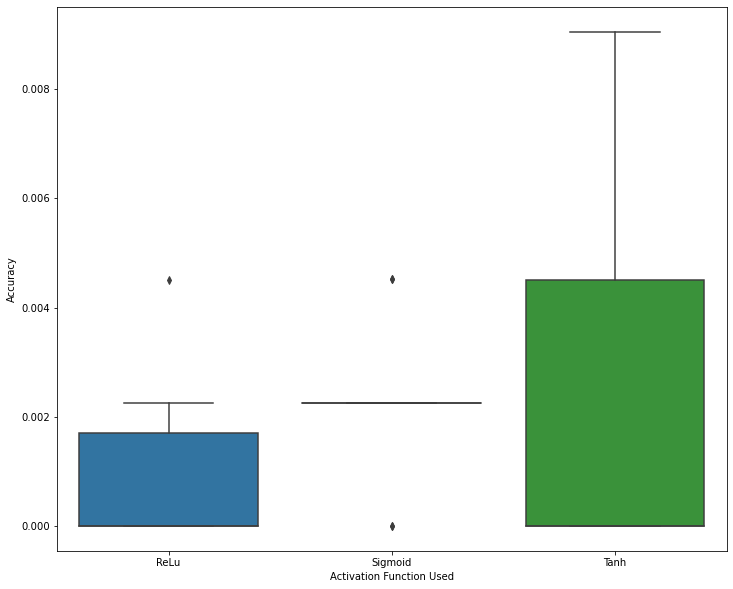

In [130]:
plt.figure(figsize = (12, 10))
ax = sns.boxplot(data = acc_df)
ax.set(ylabel = "Accuracy", xlabel = "Activation Function Used")
plt.savefig("12.png")

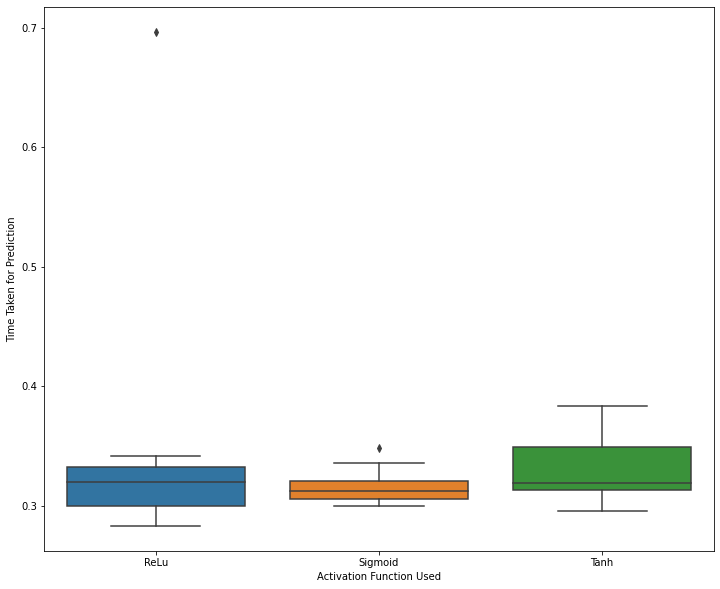

In [131]:
time_df = pd.DataFrame(ac_funcs_score_time)
time_df = time_df.T

time_df = time_df.rename(columns = {0:'ReLu', 1:'Sigmoid', 2:'Tanh'})

plt.figure(figsize = (12, 10))
ax = sns.boxplot(data = time_df)
ax.set(ylabel = "Time Taken for Prediction", xlabel = "Activation Function Used")
plt.savefig("14.png")